<a href="https://colab.research.google.com/github/rk2026/GEOG-510/blob/main/Australia3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Necessory Library

In [ ]:
import os
import sys
from google.colab import drive
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point
from shapely.geometry import Polygon
from itertools import product
from google.colab import data_table
import numpy as np
import math
from google.colab import files
data_table.enable_dataframe_formatter()

Google Drive Connection and Necessary file connection stored in google drive folder.

In [ ]:
drive.mount('/content/drive')
MTanalysis = os.path.join('drive', 'My Drive', 'MTanalysis')
sppVal = pd.read_csv(os.path.join(MTanalysis, 'sppVal.csv'))

Mounted at /content/drive


Upload Stem mapping file

In [ ]:
stemmapping = files.upload()
df = pd.read_csv('TreeLoc.csv')

Saving TreeLoc.csv to TreeLoc.csv


Upload Boundary polygon shape zip

In [ ]:
cfouter_shp = files.upload()

Saving cfouter.shp to cfouter.shp


Read sppVal.csv table inorder to join dataframe with its species value

# Join the GeoDataFrames based on the 'species' column
merged_gdf = df_with_remarks.merge(sppVal, left_on='species', right_on='Scientific Name')

In [ ]:
joined_df = df.merge(sppVal, left_on='species', right_on='Scientific Name')

copy the joined_df as 'result_df'.

In [ ]:
result_df = joined_df.copy()

## Function to perform calculations and add new columns

In [ ]:
def add_calculated_columns(df):
    df['stem_volume'] = np.exp(df['a'] + df['b'] * np.log(df['dia_cm']) + df['c'] * np.log(df['height_m'])) / 1000
    df['branch_ratio'] = df['dia_cm'].apply(lambda x: 0.1 if x < 10 else 0.2)
    df['branch_volume'] = df['stem_volume'] * df['branch_ratio']
    df['tree_volume'] = df['stem_volume'] + df['branch_volume']
    df['cm10diaratio'] = np.exp(df['a1'] + df['b1'] * np.log(df['dia_cm']))
    df['cm10topvolume'] = df['stem_volume'] * df['cm10diaratio']
    df['gross_volume'] = df['stem_volume'] - df['cm10topvolume']
    df['net_volume'] = df.apply(lambda row: row['gross_volume'] * 0.9 if row['class'] == 'A' else row['gross_volume'] * 0.8, axis=1)
    df['net_volum_cft'] = df['net_volume'] * 35.3147
    df['firewood_m3'] = df['tree_volume'] - df['net_volume']
    df['firewood_chatta'] = df['firewood_m3'] * 0.105944
    return df

Apply the function to the dataframe

In [ ]:
result_df = add_calculated_columns(df=result_df)

In [ ]:
columns_to_drop = ['SN', 'Scientific Name', 'a', 'b', 'c', 'a1', 'b1', 's', 'm', 'bg']
result_df = result_df.drop(columns=columns_to_drop)

In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=result_df)

https://docs.google.com/spreadsheets/d/1CzggcPVUck1eyooTgGaIFF5SvU7czV88dIiHfKTjn9Q#gid=0


/usr/local/lib/python3.10/dist-packages/google/colab/sheets.py:31: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return frame.applymap(_clean_val).replace({np.nan: None})


In [ ]:
result_df

,TID,species,X,Y,dia_cm,height_m,class,Local Name,stem_volume,branch_ratio,branch_volume,tree_volume,cm10diaratio,cm10topvolume,gross_volume,net_volume,net_volum_cft,firewood_m3,firewood_chatta
0,1,Shorea robusta,317432,3002539,60,25,2,Sal,3.050025,0.2,0.610005,3.660030,0.007109,0.021681,3.028344,2.422675,85.556042,1.237355,0.131090
1,2,Shorea robusta,316530,3002219,60,25,2,Sal,3.050025,0.2,0.610005,3.660030,0.007109,0.021681,3.028344,2.422675,85.556042,1.237355,0.131090
2,3,Shorea robusta,316810,3002295,60,25,2,Sal,3.050025,0.2,0.610005,3.660030,0.007109,0.021681,3.028344,2.422675,85.556042,1.237355,0.131090
3,4,Shorea robusta,317131,3001778,60,25,2,Sal,3.050025,0.2,0.610005,3.660030,0.007109,0.021681,3.028344,2.422675,85.556042,1.237355,0.131090
4,22,Shorea robusta,317371,3002015,103,18,1,Sal,6.481284,0.2,1.296257,7.777540,0.001862,0.012070,6.469214,5.175371,182.766677,2.602169,0.275684
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27591,27493,Albizia spp,317479,3001807,86,30,2,Siris,6.011906,0.2,1.202381,7.214287,0.004347,0.026132,5.985774,4.788619,169.108641,2.425668,0.256985
27592,27516,Albizia spp,317403,3002283,75,27,3,Siris,4.267154,0.2,0.853431,5.120585,0.005881,0.025097,4.242057,3.393646,119.845582,1.726939,0.182959
27593,27539,Albizia spp,317153,3002290,52,17,2,Siris,1.431955,0.2,0.286391,1.718346,0.013210,0.018916,1.413039,1.130431,39.920828,0.587915,0.062286
27594,27562,Albizia spp,317050,3002316,35,23,4,Siris,0.955015,0.2,0.191003,1.146018,0.031679,0.030254,0.924760,0.739808,26.126112,0.406209,0.043035


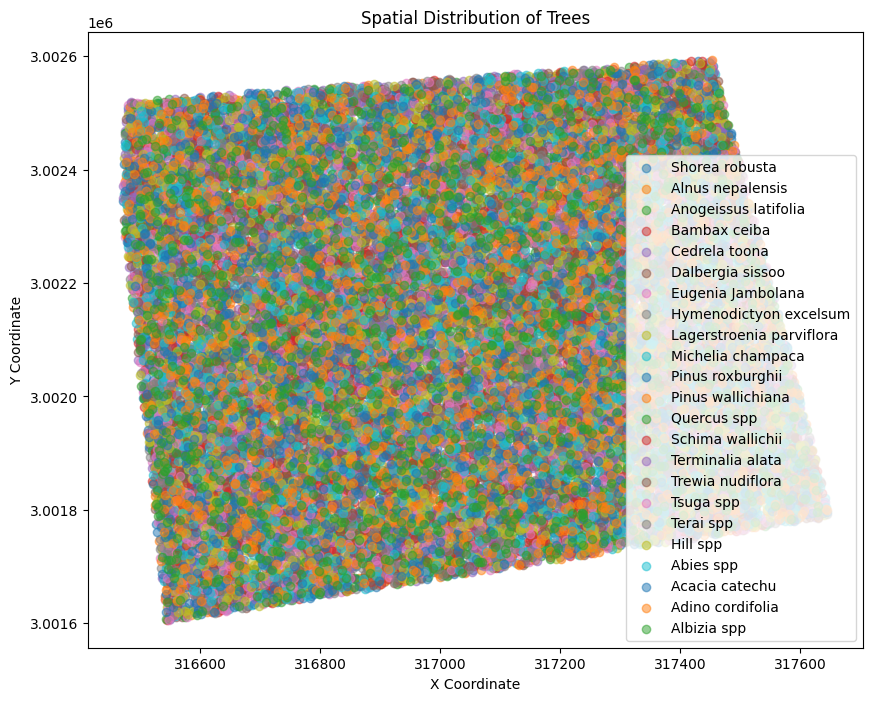

In [ ]:
# @title Spatial Distribution of Trees

import matplotlib.pyplot as plt

# Assuming your data is in a pandas DataFrame named 'df'

plt.figure(figsize=(10, 8))
for species in df['species'].unique():
    subset = df[df['species'] == species]
    plt.scatter(subset['X'], subset['Y'], label=species, alpha=0.5)
plt.title('Spatial Distribution of Trees')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
_ = plt.legend()

In [ ]:
result_df.to_csv('result_df.csv', index=False)
files.download('result_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>